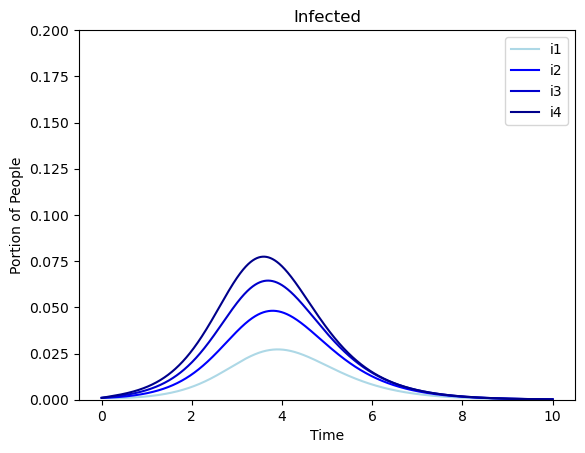

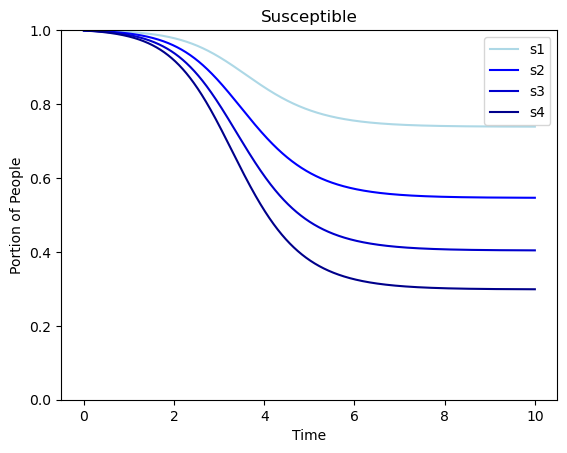

In [1]:
# Problem 2c
import numpy as np
import matplotlib.pyplot as plt

#initial values
dt=0.001
num_points = int(10 / dt) + 1 
t = np.linspace(0, 10, num_points)
gamma=3
i1=np.zeros(num_points)
s1=np.zeros(num_points)
i2=np.zeros(num_points)
s2=np.zeros(num_points)
i3=np.zeros(num_points)
s3=np.zeros(num_points)
i4=np.zeros(num_points)
s4=np.zeros(num_points)

#si equations
def i1dot(s1,i1,i2,i3,i4):
    return (0.45*s1*i1)+(0.45*s1*i2)+(0.45*s1*i3)+(0.45*s1*i4)-(gamma*i1)
def i2dot(s2,i1,i2,i3,i4):
    return (2*0.45*s2*i1)+(2*0.45*s2*i2)+(2*0.45*s2*i3)+(2*0.45*s2*i4)-(gamma*i2)
def i3dot(s3,i1,i2,i3,i4):
    return (3*0.45*s3*i1)+(3*0.45*s3*i2)+(3*0.45*s3*i3)+(3*0.45*s3*i4)-(gamma*i3)
def i4dot(s4,i1,i2,i3,i4):
    return (4*0.45*s4*i1)+(4*0.45*s4*i2)+(4*0.45*s4*i3)+(4*0.45*s4*i4)-(gamma*i4)
def s1dot(s1,i1,i2,i3,i4):
    return -(0.45*s1*i1)-(0.45*s1*i2)-(0.45*s1*i3)-(0.45*s1*i4)
def s2dot(s2,i1,i2,i3,i4):
    return -(2*0.45*s2*i1)-(2*0.45*s2*i2)-(2*0.45*s2*i3)-(2*0.45*s2*i4)
def s3dot(s3,i1,i2,i3,i4):
    return -(3*0.45*s3*i1)-(3*0.45*s3*i2)-(3*0.45*s3*i3)-(3*0.45*s3*i4)
def s4dot(s4,i1,i2,i3,i4):
    return -(4*0.45*s4*i1)-(4*0.45*s4*i2)-(4*0.45*s4*i3)-(4*0.45*s4*i4)
i1[0]=.001
s1[0]=.999
i2[0]=.001
s2[0]=.999
i3[0]=.001
s3[0]=.999
i4[0]=.001
s4[0]=.999


#forward euler
for k in range(num_points - 1):  
    i1[k + 1] = i1[k] + i1dot(s1[k], i1[k], i2[k], i3[k], i4[k]) * dt
    i2[k + 1] = i2[k] + i2dot(s2[k], i1[k], i2[k], i3[k], i4[k]) * dt
    i3[k + 1] = i3[k] + i3dot(s3[k], i1[k], i2[k], i3[k], i4[k]) * dt
    i4[k + 1] = i4[k] + i4dot(s4[k], i1[k], i2[k], i3[k], i4[k]) * dt
    s1[k + 1] = s1[k] + s1dot(s1[k], i1[k], i2[k], i3[k], i4[k]) * dt
    s2[k + 1] = s2[k] + s2dot(s2[k], i1[k], i2[k], i3[k], i4[k]) * dt
    s3[k + 1] = s3[k] + s3dot(s3[k], i1[k], i2[k], i3[k], i4[k]) * dt
    s4[k + 1] = s4[k] + s4dot(s4[k], i1[k], i2[k], i3[k], i4[k]) * dt

# Plotting
plt.plot(t, i1, label='i1', color='lightblue')
plt.plot(t, i2, label='i2', color='blue')
plt.plot(t, i3, label='i3', color='mediumblue')
plt.plot(t, i4, label='i4', color='darkblue')

plt.ylim(0, 0.2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Portion of People')
plt.title('Infected')

plt.show()
 
plt.plot(t, s1, label='s1', color='lightblue')
plt.plot(t, s2, label='s2', color='blue')
plt.plot(t, s3, label='s3', color='mediumblue')
plt.plot(t, s4, label='s4', color='darkblue')

plt.ylim(0, 1)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Portion of People')
plt.title('Susceptible')

plt.show()

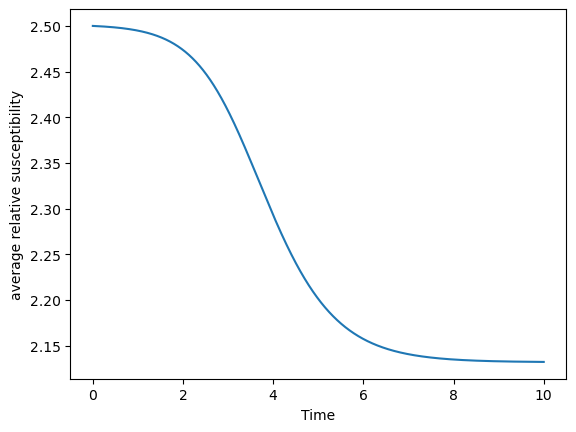

In [9]:
#problem 2d

p=np.array([[1],[2],[3],[4]])

s=np.vstack((s1,s2,s3,s4))

sum1=np.sum(p*s,axis=0)
sum2=np.sum(s,axis=0)
pbar = sum1/sum2

plt.plot(t, pbar)
plt.xlabel('Time')
plt.ylabel('average relative susceptibility')
plt.show()


In [21]:
#Problem 3

import numpy as np
from scipy.stats import nbinom

def n_children_nb(R0,k,n_draws):
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    draw = nbinom.rvs(n=n,p=p)
    draws = nbinom.rvs(n=n,p=p,size=n_draws)
    total_children = np.sum(draws)
    return total_children


def single_branching_process(children_function, R0, k, n_generations):
    z = np.zeros(n_generations, dtype=int)
    z[0] = 1
    for generation in np.arange(1, n_generations):
        z[generation] = children_function(R0, k, z[generation-1])
    return z

def qcalc(children_function, R0, k, n_generations, nsims):
    count = sum(single_branching_process(children_function, R0, k, n_generations)[-1]==0
                           for _ in range(nsims))
    q =count/nsims
    return q


q = qcalc(n_children_nb, 3, 10, 10, 10000)
print(q)


0.0925
